## Identifying Business Opportunities for Up-and-Coming Neighborhoods in San Francisco

## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

<a id= 'introduction'> </a>

## Introduction

### Description
In this project we will identify potential business opportunities in San Francisco. Given the difficulty in predicting the success of a new business, we will use real estate information to find up-and-coming neighborhoods in San Francisco (based on single family home value or SFHV). We will then identify the most common venue categories in the most affluent neighborhoods as a baseline for San Francisco's ever-changing demographic. We will then select a business in zip codes with unsaturated markets.

_____

<a id= 'data'> </a>

## Data

Based on the definition of our problem, factors that will influence our decision are:

* Value of homes in the area (sorted by postal code)
* Top 10 venue categories per postal code

The following data sources will be needed to extract/generate the required information:

* Data on single family home values (SFHV) downloaded from Zillow
* Postal codes will be geocoded using ArcGIS
* Most common venue categories for each postal code will be obtained using Foursquare API

### Description of the Data

Housing data is available through Zillow in the form of csv files. Single family home values are categorized by postal or zip code as the 'RegionName".

In [1]:
#Importing relevant libraries and packages

import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import math
ordinal = lambda n: "%d%s" % (n,"tsnrhtdd"[(math.floor(n/10)%10!=1)*(n%10<4)*n%10::4])

import json
import geocoder
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

from functools import reduce

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Libraries imported.


In [2]:
#Importing data on single family homes in the US
df_hv = pd.read_csv('~/Desktop/Coursera_Capstone/Zip_Zhvi_SingleFamilyResidence.csv')
print('File imported.')
df_hv.head()

File imported.


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,61639,0,10025,Zip,NY,NY,New York,New York-Newark-Jersey City,New York County,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1513130.0,1521683.0,1520682.0,1526830.0,1529485.0,1536433.0,1549683.0,1575387.0,1603481.0,1628358.0,1647174.0,1677270.0,1711039.0,1731261.0,1742661.0,1744659.0,1752491.0,1761396.0,1761418.0,1752466.0,1737604.0,1728035.0,1728620.0,1729029.0,1739112.0,1763236.0,1807891.0,184

The Foursquare API returns a json file for the venue search results based on latitidude and longitude coordinates, radius, and limit. An example of the parsed results for San Francisco, California is shown below.

In [3]:
#Credentials for Foursquare API

CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx' # your Foursquare Secret
TOKEN = 'xxx' #auth token
VERSION = '20180605' # Foursquare API version

LIMIT = 100
RADIUS = 1000

In [4]:
#Encoding latitude, longitude coordinates for San Francisco, CA for folium map
g = geocoder.arcgis('San Francisco, Califoria')
sf_ll = g.latlng
sf_lat = sf_ll[0]
sf_lng = sf_ll[1]

In [5]:
#Example output of Foursquare API using explore
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&oauth_token={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET,
    TOKEN,
    VERSION,
    sf_lat, 
    sf_lng, 
    RADIUS, 
    LIMIT)
            
# make the GET request
results = requests.get(url).json()['response']['groups'][0]['items']

venues_list = []
venues_list.append([(
    v['venue']['name'],
    v['venue']['id'],
    v['venue']['categories'][0]['name'],
    v['venue']['location']['lat'],
    v['venue']['location']['lng']) for v in results])

nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
nearby_venues.columns = ['Venue',
                         'Venue ID',
                         'Venue Category',
                         'Venue Latitude',
                         'Venue Longitude']
nearby_venues.head()

,Venue,Venue ID,Venue Category,Venue Latitude,Venue Longitude
0,Louise M. Davies Symphony Hall,4aa48566f964a520024720e3,Concert Hall,37.777976,-122.420157
1,SFJazz Center,50f21340e4b036c5cc0d7c7d,Jazz Club,37.776350,-122.421539
2,War Memorial Opera House,49c7dcc3f964a520c9571fe3,Opera House,37.778601,-122.420816
3,San Francisco Ballet,4b2e994af964a5205ee324e3,Dance Studio,37.778580,-122.420798
4,New Conservatory Theatre Center,4a346043f964a520279c1fe3,Theater,37.775591,-122.419753


_____

<a id= 'methodology'> </a>

## Methodology

We can sort through the data on single family homes using a list of postal codes for San Francisco, California.

In [6]:
#Importing list of San Francisco zip codes
df_zip = pd.read_csv('~/Desktop/Coursera_Capstone/San Francisco Zip Codes.csv')

In [7]:
df_zip.drop(['Unnamed: 0', 'Population', 'Area Code(s)'], axis = 1, inplace = True)
df_zip = df_zip.loc[df_zip['Type'] == 'Standard']
df_zip = df_zip.loc[df_zip['County'] == 'San Francisco']
valid_zip = df_zip['ZIPCode'].values.tolist()

In [8]:
#Filtering single family home value data by San Francisco zip codes
df_hv = df_hv[df_hv['RegionName'].isin(valid_zip)]
df_hv.reset_index(inplace = True)
df_hv.head()

,index,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,1996-01-31,1996-02-29,1996-03-31,1996-04-30,1996-05-31,1996-06-30,1996-07-31,1996-08-31,1996-09-30,1996-10-31,1996-11-30,1996-12-31,1997-01-31,1997-02-28,1997-03-31,1997-04-30,1997-05-31,1997-06-30,1997-07-31,1997-08-31,1997-09-30,1997-10-31,1997-11-30,1997-12-31,1998-01-31,1998-02-28,1998-03-31,1998-04-30,1998-05-31,1998-06-30,1998-07-31,1998-08-31,1998-09-30,1998-10-31,1998-11-30,1998-12-31,1999-01-31,1999-02-28,1999-03-31,1999-04-30,1999-05-31,1999-06-30,1999-07-31,1999-08-31,1999-09-30,1999-10-31,1999-11-30,1999-12-31,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,2000-06-30,2000-07-31,2000-08-31,2000-09-30,2000-10-31,2000-11-30,2000-12-31,2001-01-31,2001-02-28,2001-03-31,2001-04-30,2001-05-31,2001-06-30,2001-07-31,2001-08-31,2001-09-30,2001-10-31,2001-11-30,2001-12-31,2002-01-31,2002-02-28,2002-03-31,2002-04-30,2002-05-31,2002-06-30,2002-07-31,2002-08-31,2002-09-30,2002-10-31,2002-11-30,2002-12-31,2003-01-31,2003-02-28,2003-03-31,2003-04-30,2003-05-31,2003-06-30,2003-07-31,2003-08-31,2003-09-30,2003-10-31,2003-11-30,2003-12-31,2004-01-31,2004-02-29,2004-03-31,2004-04-30,2004-05-31,2004-06-30,2004-07-31,2004-08-31,2004-09-30,2004-10-31,2004-11-30,2004-12-31,2005-01-31,2005-02-28,2005-03-31,2005-04-30,2005-05-31,2005-06-30,2005-07-31,2005-08-31,2005-09-30,2005-10-31,2005-11-30,2005-12-31,2006-01-31,2006-02-28,2006-03-31,2006-04-30,2006-05-31,2006-06-30,2006-07-31,2006-08-31,2006-09-30,2006-10-31,2006-11-30,2006-12-31,2007-01-31,2007-02-28,2007-03-31,2007-04-30,2007-05-31,2007-06-30,2007-07-31,2007-08-31,2007-09-30,2007-10-31,2007-11-30,2007-12-31,2008-01-31,2008-02-29,2008-03-31,2008-04-30,2008-05-31,2008-06-30,2008-07-31,2008-08-31,2008-09-30,2008-10-31,2008-11-30,2008-12-31,2009-01-31,2009-02-28,2009-03-31,2009-04-30,2009-05-31,2009-06-30,2009-07-31,2009-08-31,2009-09-30,2009-10-31,2009-11-30,2009-12-31,2010-01-31,2010-02-28,2010-03-31,2010-04-30,2010-05-31,2010-06-30,2010-07-31,2010-08-31,2010-09-30,2010-10-31,2010-11-30,2010-12-31,2011-01-31,2011-02-28,2011-03-31,2011-04-30,2011-05-31,2011-06-30,2011-07-31,2011-08-31,2011-09-30,2011-10-31,2011-11-30,2011-12-31,2012-01-31,2012-02-29,2012-03-31,2012-04-30,2012-05-31,2012-06-30,2012-07-31,2012-08-31,2012-09-30,2012-10-31,2012-11-30,2012-12-31,2013-01-31,2013-02-28,2013-03-31,2013-04-30,2013-05-31,2013-06-30,2013-07-31,2013-08-31,2013-09-30,2013-10-31,2013-11-30,2013-12-31,2014-01-31,2014-02-28,2014-03-31,2014-04-30,2014-05-31,2014-06-30,2014-07-31,2014-08-31,2014-09-30,2014-10-31,2014-11-30,2014-12-31,2015-01-31,2015-02-28,2015-03-31,2015-04-30,2015-05-31,2015-06-30,2015-07-31,2015-08-31,2015-09-30,2015-10-31,2015-11-30,2015-12-31,2016-01-31,2016-02-29,2016-03-31,2016-04-30,2016-05-31,2016-06-30,2016-07-31,2016-08-31,2016-09-30,2016-10-31,2016-11-30,2016-12-31,2017-01-31,2017-02-28,2017-03-31,2017-04-30,2017-05-31,2017-06-30,2017-07-31,2017-08-31,2017-09-30,2017-10-31,2017-11-30,2017-12-31,2018-01-31,2018-02-28,2018-03-31,2018-04-30,2018-05-31,2018-06-30,2018-07-31,2018-08-31,2018-09-30,2018-10-31,2018-11-30,2018-12-31,2019-01-31,2019-02-28,2019-03-31,2019-04-30,2019-05-31,2019-06-30,2019-07-31,2019-08-31,2019-09-30,2019-10-31,2019-11-30,2019-12-31,2020-01-31,2020-02-29,2020-03-31
0,13,97564,13,94109,Zip,CA,CA,San Francisco,San Francisco-Oakland-Hayward,San Francisco County,616693.0,621942.0,625642.0,629519.0,630085.0,624109.0,620717.0,618263.0,621895.0,624398.0,623636.0,623763.0,634547.0,644534.0,651405.0,650214.0,655155.0,669665.0,682029.0,692082.0,694260.0,697575.0,704472.0,709780.0,705547.0,695463.0,687577.0,692804.0,700208.0,708422.0,715300.0,723162.0,731986.0,741653.0,755093.0,766935.0,768511.0,775226.0,783961.0,802828.0,813013.0,823704.0,833657.0,848040.0,856556.0,866777.0,873864.0,890302.0,909003.0,925017.0,939210.0,946851.0,961211.0,975479.0,995190.0,1011319.0,1032342.0,1051233.0,1078775.0,1108854.0,1145289.0,1175261.0,1191286.0,1209389.0,1221023.0,1232789.0,1225993.0,1219

In [9]:
#Renaming dataframe column so that it is easier to refer to
df_hvc = pd.DataFrame(df_hv['RegionName'])
df_hvc.rename(columns={'RegionName': 'ZipCode'}, inplace = True)

For every zip code in the list we can append latitude and longitude coordinates for Foursquare API use later.

In [10]:
#Setting latitude and longitude lists to append to dataframe
index = len(df_hvc['ZipCode'])
latitude = []
longitude = []

#Using arcgis to return latitude and longitude coordinates
for counter in range(0, index):
    #initialize your variable to None
    lat_lng_coords = None
    
    while(lat_lng_coords is None):
        g = geocoder.arcgis('{}, San Francisco, California'.format(df_hvc.iloc[counter,0]))
        lat_lng_coords = g.latlng
        latitude.append(lat_lng_coords[0])
        longitude.append(lat_lng_coords[1])
        
df_hvc['Latitude'] = latitude
df_hvc['Longitude'] = longitude

Let's average the value of single family homes by year to account for seasonal variation and look at longer term trends.

In [11]:
#Sorting columns by year
col_2010 = df_hv.loc[: , '2010-01-31':'2010-12-31']
col_2011 = df_hv.loc[: , '2011-01-31':'2011-12-31']
col_2012 = df_hv.loc[: , '2012-01-31':'2012-12-31']
col_2013 = df_hv.loc[: , '2013-01-31':'2013-12-31']
col_2014 = df_hv.loc[: , '2014-01-31':'2014-12-31']
col_2015 = df_hv.loc[: , '2015-01-31':'2015-12-31']
col_2016 = df_hv.loc[: , '2016-01-31':'2016-12-31']
col_2017 = df_hv.loc[: , '2017-01-31':'2017-12-31']
col_2018 = df_hv.loc[: , '2018-01-31':'2018-12-31']
col_2019 = df_hv.loc[: , '2019-01-31':'2019-12-31']
col_2020 = df_hv.loc[: , '2020-01-31':'2020-03-31']

list_hv = [col_2010, col_2011, col_2012, col_2013, col_2014, col_2015, col_2016, col_2017, col_2018, col_2019, col_2020]


In [12]:
#Averaging columns by year
years = ['2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020']
for (average_hv, year) in zip(list_hv, years):
    df_hvc[year] = average_hv.mean(axis = 1)

In [13]:
df_hvc.sort_values(by=['2020'], ascending = False, inplace = True)
df_hvc.reset_index(inplace = True)
df_hvc.drop(['index'], axis = 1, inplace = True)
df_hvc

,ZipCode,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,94123,37.800120,-122.437780,1.993351e+06,1.916556e+06,2.070580e+06,2.410422e+06,2.862632e+06,3.285577e+06,3.405033e+06,3.562052e+06,4.145944e+06,4.412799e+06,4.559374e+06
1,94115,37.785415,-122.434810,1.716008e+06,1.641894e+06,1.803552e+06,2.093870e+06,2.486274e+06,2.715037e+06,2.853532e+06,3.048126e+06,3.514261e+06,3.872078e+06,4.064293e+06
2,94109,37.790510,-122.421155,1.504490e+06,1.423834e+06,1.527591e+06,1.783966e+06,2.007961e+06,2.293159e+06,2.424327e+06,2.535366e+06,2.805415e+06,3.043986e+06,3.175612e+06
3,94108,37.791261,-122.407710,1.829388e+06,1.732777e+06,1.885581e+06,2.063709e+06,2.284172e+06,2.533666e+06,2.657831e+06,2.690403e+06,2.768188e+06,2.905335e+06,3.011857e+06
4,94133,37.802140,-122.410905,1.283457e+06,1.195775e+06,1.269530e+06,1.542244e+06,1.831116e+06,2.146902e+06,2.285874e+06,2.420426e+06,2.645515e+06,2.839853e+06,2.964231e+06
5,94117,37.768785,-122.448920,1.086000e+06,1.063596e+06,1.175099e+06,1.338286e+06,1.540263e+06,1.827281e+06,2.116019e+06,2.231371e+06,2.509222e+06,2.698715e+06,2.836103e+06
6,94129,37.796753,-122.454779,1.670650e+06,1.739121e+06,1.767134e+06,1.933168e+06,2.272788e+06,2.310255e+06,2.427903e+06,2.615311e+06,2.859267e+06,2.763879e+06,2.617750e+06
7,94118,37.782929,-122.454435,1.277855e+06,1.221510e+06,1.303059e+06,1.531055e+06,1.755935e+06,1.953124e+06,2.053649e+06,2.059157e+06,2.327378e+06,2.525331e+06,2.608753e+06
8,94114,37.760195,-122.437130,1.033887e+06,9.955615e+05,1.115997e+06,1.285718e+06,1.500355e+06,1.762292e+06,1.879543e+06,2.025704e+06,2.286592e+06,2.407237e+06,2.522170e+06
9,94102,37.777015,-122.421875,8.045590e+05,7.832152e+05,8.316916e+05,9.960548e+05,1.126598e+06,1.308334e+06,1.432738e+06,1.522823e+06,1.693608e+06,1.822680e+06,1.905571e+06


Let's compare the top and bottom zip codes in terms of single family home value and year-over-year changes in SFHV.

In [14]:
#Zip code 94103
topzip = pd.DataFrame(df_hvc.head(1)).transpose()
topzip.drop(['ZipCode', 'Latitude', 'Longitude'], axis = 0, inplace = True)
topzip.reset_index(inplace = True)
topzip.columns = ['Year', 'Home Value']

yoy = [0]
counter = 1

#Calculating year-over-year change in SFHV
for year in range(0, 10):
    yoycalc = ((topzip.iloc[counter, 1] - topzip.iloc[year, 1])/topzip.iloc[year, 1])
    yoy.append(yoycalc)
    counter = counter + 1

#Converting fraction to percentage
yoy = [i * 100 for i in yoy]
topzip['Year Over Year'] = yoy

topzip

,Year,Home Value,Year Over Year
0,2010,1.993351e+06,0.000000
1,2011,1.916556e+06,-3.852570
2,2012,2.070580e+06,8.036481
3,2013,2.410422e+06,16.412894
4,2014,2.862632e+06,18.760626
5,2015,3.285577e+06,14.774698
6,2016,3.405033e+06,3.635759
7,2017,3.562052e+06,4.611389
8,2018,4.145944e+06,16.392008
9,2019,4.412799e+06,6.436523


In [15]:
#Zip code 94111
botzip = pd.DataFrame(df_hvc.tail(1)).transpose()
botzip.drop(['ZipCode', 'Latitude', 'Longitude'], axis = 0, inplace = True)
botzip.reset_index(inplace = True)
botzip.columns = ['Year', 'Home Value']

yoy = [0]
counter = 1

#Calculating year-over-year change in SFHV
for year in range(0, 10):
    yoycalc = ((botzip.iloc[counter, 1] - botzip.iloc[year, 1])/botzip.iloc[year, 1])
    yoy.append(yoycalc)
    counter = counter + 1

#Converting fraction to percentage
yoy = [i * 100 for i in yoy]
botzip['Year Over Year'] = yoy

botzip

,Year,Home Value,Year Over Year
0,2010,4.805710e+05,0.000000
1,2011,4.339636e+05,-9.698341
2,2012,4.374995e+05,0.814796
3,2013,5.579926e+05,27.541308
4,2014,6.622263e+05,18.680132
5,2015,7.623567e+05,15.120258
6,2016,8.202320e+05,7.591635
7,2017,8.727216e+05,6.399358
8,2018,9.566055e+05,9.611761
9,2019,9.965872e+05,4.179536


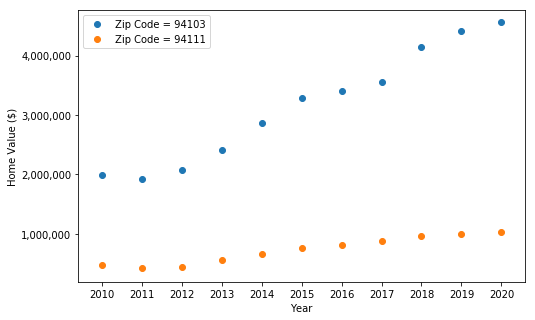

In [16]:
fig_topbot, ax = plt.subplots(figsize=(8, 5))    

plt.scatter(topzip['Year'], topzip['Home Value'], label = 'Zip Code = 94103')
plt.scatter(botzip['Year'], botzip['Home Value'], label = 'Zip Code = 94111')

plt.legend(loc='best', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Home Value ($)')
ax.get_yaxis().set_major_formatter(mtick.FuncFormatter(lambda y, p: format(int(y), ',')))

plt.show()

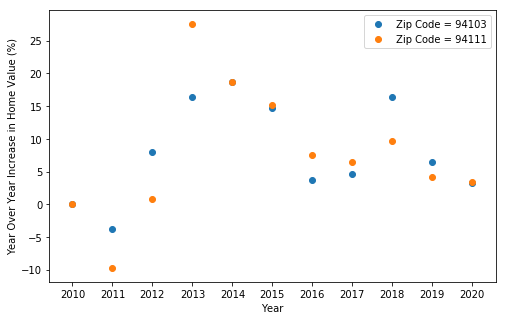

In [17]:
fig_yoy, ax = plt.subplots(figsize=(8, 5))    

plt.scatter(topzip['Year'], topzip['Year Over Year'], label = 'Zip Code = 94103')
plt.scatter(botzip['Year'], botzip['Year Over Year'], label = 'Zip Code = 94111')

plt.legend(loc='best', fontsize=10)
plt.xlabel('Year')
plt.ylabel('Year Over Year Increase in Home Value (%)')

plt.show()

Interestingly, while the top zip code has seen a large increase in SFHV compared to the bottom zip code, no clear trends are observed in the year-over-year increases between the two.

For the sake of argument let's assume that the top 5 zip codes in terms of single family home value represent the more affluent demographic behind the skyrocketing housing prices in San Francisco. Over time we can reasonably expect that the home values of these zip codes will plateau as the SFHV of other zipcodes will rise as this demographic spreads to cheaper areas. Let's compare the top 5 and bottom 10 zip codes in San Francisco.

In [18]:
top5 = pd.DataFrame(df_hvc.head())
top5

,ZipCode,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,94123,37.800120,-122.437780,1.993351e+06,1.916556e+06,2.070580e+06,2.410422e+06,2.862632e+06,3.285577e+06,3.405033e+06,3.562052e+06,4.145944e+06,4.412799e+06,4.559374e+06
1,94115,37.785415,-122.434810,1.716008e+06,1.641894e+06,1.803552e+06,2.093870e+06,2.486274e+06,2.715037e+06,2.853532e+06,3.048126e+06,3.514261e+06,3.872078e+06,4.064293e+06
2,94109,37.790510,-122.421155,1.504490e+06,1.423834e+06,1.527591e+06,1.783966e+06,2.007961e+06,2.293159e+06,2.424327e+06,2.535366e+06,2.805415e+06,3.043986e+06,3.175612e+06
3,94108,37.791261,-122.407710,1.829388e+06,1.732777e+06,1.885581e+06,2.063709e+06,2.284172e+06,2.533666e+06,2.657831e+06,2.690403e+06,2.768188e+06,2.905335e+06,3.011857e+06
4,94133,37.802140,-122.410905,1.283457e+06,1.195775e+06,1.269530e+06,1.542244e+06,1.831116e+06,2.146902e+06,2.285874e+06,2.420426e+06,2.645515e+06,2.839853e+06,2.964231e+06


In [19]:
bottom10 = pd.DataFrame(df_hvc.sort_values(by=['2020'], ascending = True).head(10))
bottom10

,ZipCode,Latitude,Longitude,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
24,94124,37.734290,-122.390640,480571.000000,433963.583333,437499.500000,5.579926e+05,6.622263e+05,7.623567e+05,8.202320e+05,8.727216e+05,9.566055e+05,9.965872e+05,1.030901e+06
23,94134,37.715590,-122.406050,574364.500000,526749.416667,538117.166667,6.466140e+05,7.357028e+05,8.132913e+05,8.566022e+05,9.206465e+05,1.024123e+06,1.065726e+06,1.098192e+06
22,94112,37.715685,-122.441645,591775.333333,551270.416667,567121.083333,6.764342e+05,7.727385e+05,8.641669e+05,9.185048e+05,9.732878e+05,1.105259e+06,1.139817e+06,1.166736e+06
21,94105,37.789380,-122.394950,814403.416667,790132.750000,863982.833333,1.007936e+06,1.114646e+06,1.288090e+06,1.330976e+06,1.275518e+06,1.326411e+06,1.329368e+06,1.347600e+06
20,94132,37.716740,-122.472145,762467.916667,699841.083333,723380.500000,8.544411e+05,9.589634e+05,1.039691e+06,1.121272e+06,1.195932e+06,1.353055e+06,1.363696e+06,1.393578e+06
19,94116,37.741165,-122.497055,798788.583333,738276.416667,761942.500000,8.968560e+05,1.004772e+06,1.091164e+06,1.189940e+06,1.258488e+06,1.419182e+06,1.426807e+06,1.472229e+06
18,94122,37.760125,-122.470050,766635.333333,709262.000000,732894.000000,8.667544e+05,9.733760e+05,1.113472e+06,1.220489e+06,1.284089e+06,1.443772e+06,1.455995e+06,1.484073e+06
17,94111,37.796955,-122.399340,674259.416667,651099.333333,716300.416667,8.589998e+05,9.859771e+05,1.152923e+06,1.222803e+06,1.273983e+06,1.371959e+06,1.498363e+06,1.580577e+06
16,94110,37.745185,-122.415905,855134.833333,816939.666667,859636.583333,1.029994e+06,1.197542e+06,1.343553e+06,1.402330e+06,1.447299e+06,1.621286e+06,1.665218e+06,1.701798e+06
15,94107,37.759050,-122.398155,694671.916667,664680.750000,702240.833333,8.485989e+05,9.869639e+05,1.153091e+06,1.256370e+06,1.358011e+06,1.558827e+06,1.717109e+06,1.738449e+06


We can visualize the location of the top 5 and bottom 10 zip codes using Folium.

In [20]:
zip_map_top = folium.Map(location=[sf_lat, sf_lng], zoom_start=12)
zip_map_bot = folium.Map(location=[sf_lat, sf_lng], zoom_start=12)

In [21]:
#Setting index for labeling
index = top5.index.tolist()
top5_index = [x+1 for x in index]
top5_index

[1, 2, 3, 4, 5]

In [22]:
colors_array_top = cm.rainbow(np.linspace(0, 1, len(top5_index)))
rainbow_top = [colors.rgb2hex(i) for i in colors_array_top]
color_counter_top = list(range(0,5))

for lat, lng, zipcode, index, color_counter in zip(top5['Latitude'], top5['Longitude'], top5['ZipCode'], top5_index, color_counter_top):
    label = folium.Popup(str(zipcode) + ', ' + ordinal(index) + ' in Home Value', parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color=rainbow_top[color_counter],
        fill_opacity=0.7).add_to(zip_map_top)

In [23]:
zip_map_top

We see that these markers reflect conventional wisdom of San Francisco neighborhoods. 94123 and 94115 are parts of Pacific Heights which is renowned for its view of the Bay Area. 94108 and 94109 are parts of Nob Hill rife with restaurants and cafes. 94133 is a part of North Beach close to downtown and the pier.

In [24]:
#Setting index for labeling
index = bottom10.index.tolist()
bottom10_index = [x+1 for x in index]
bottom10_index

[25, 24, 23, 22, 21, 20, 19, 18, 17, 16]

In [25]:
colors_array_bot = cm.rainbow(np.linspace(0, 1, len(bottom10_index)))
rainbow_bot = [colors.rgb2hex(i) for i in colors_array_bot]
color_counter_bot = list(range(0,10))


for lat, lng, zipcode, index, color_counter in zip(bottom10['Latitude'], bottom10['Longitude'], bottom10['ZipCode'], bottom10_index, color_counter_bot):
    label = folium.Popup(str(zipcode) + ', ' + ordinal(index) + ' in Home Value', parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=10,
        popup=label,
        color='blue',
        fill=True,
        fill_color=rainbow_bot[color_counter],
        fill_opacity=0.7).add_to(zip_map_bot)

In [26]:
zip_map_bot

Interestingly 94111 and 94105 are both in the commercial district. The single family homes in these zip codes may include condos that are lower in price compared to other homes with their own plots of land. The rest of the zip codes are on the outskirts of San Francisco which reflect their lower home values.

Let's compare the most common venues for the top 5 zip codes with each of the bottom 10 zip codes using Foursquare API. 

In [27]:
CLIENT_ID = 'xxx' # your Foursquare ID
CLIENT_SECRET = 'xxx' # your Foursquare Secret
TOKEN = 'xxx' #auth token
VERSION = '20180605' # Foursquare API version

LIMIT = 1000
RADIUS = 1000

In [28]:
#Defining function to request and filter Foursquare API results
def getNearbyVenues(zipcodes, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for zipcode, lat, lng in zip(zipcodes, latitudes, longitudes):
        print(zipcode)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&oauth_token={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET,
            TOKEN,
            VERSION,
            lat, 
            lng, 
            RADIUS, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            zipcode, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['ZipCode', 
                  'ZipCode Latitude', 
                  'ZipCode Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [29]:
top5_venues = getNearbyVenues(zipcodes=top5['ZipCode'],
                              latitudes=top5['Latitude'],
                              longitudes=top5['Longitude']
                              )

94123
94115
94109
94108
94133


In [30]:
top5_venues.groupby('ZipCode').count()

,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
ZipCode,,,,,,
94108,100,100,100,100,100,100
94109,100,100,100,100,100,100
94115,100,100,100,100,100,100
94123,100,100,100,100,100,100
94133,100,100,100,100,100,100


In [31]:
bottom10_venues = getNearbyVenues(zipcodes=bottom10['ZipCode'],
                                  latitudes=bottom10['Latitude'],
                                  longitudes=bottom10['Longitude']
                                 )

94124
94134
94112
94105
94132
94116
94122
94111
94110
94107


In [32]:
bottom10_venues.groupby('ZipCode').count()

,ZipCode Latitude,ZipCode Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
ZipCode,,,,,,
94105,100,100,100,100,100,100
94107,100,100,100,100,100,100
94110,100,100,100,100,100,100
94111,100,100,100,100,100,100
94112,33,33,33,33,33,33
94116,38,38,38,38,38,38
94122,100,100,100,100,100,100
94124,22,22,22,22,22,22
94132,42,42,42,42,42,42


We can use one hot encoding to calculate the average frequency of each venue category.

In [33]:
#One hot encoding
top5_onehot = pd.get_dummies(top5_venues[['Venue Category']], prefix="", prefix_sep="")

#Ddd neighborhood column back to dataframe
top5_onehot['ZipCode'] = top5_venues['ZipCode'] 

#Move neighborhood column to the first column
fixed_columns = [top5_onehot.columns[-1]] + list(top5_onehot.columns[:-1])
top5_onehot = top5_onehot[fixed_columns]

top5_grouped = top5_onehot.groupby('ZipCode').mean().reset_index()
top5_grouped



,ZipCode,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Bath House,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store,Farmers Market,Filipino Restaurant,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Motel,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Pedestrian Plaza,Perfume Shop,Pet Store,Pizza Place,Playground,Plaza,Poke Place,Pop-Up Shop,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Sicilian Restaurant,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Tour Provider,Toy / Game Store,Trade School,Trail,Trattoria/Osteria,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,94108,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.03,0.01,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.03,0.04,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.02,0.04,0.07,0.01,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.03,0.00,0.01,0.00,0.01,0.00,0.00,0.05,0.01,0.00,0.00,0.00,0.02,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.05,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.02,0.00,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.02,0.00,0.01,0.01,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.00,0.01,0.03,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.01,0.02,0.01,0.00,0.00,0.01
1,94109,0.00,0.01,0.01,0.01,0.00,0.02,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.02,0.02,0.00,0.01,0.00,0.00,0.01,0.01,0.01,0.01,0.00,0.01,0.00,0.02,0.00,0.00,0.02,0.01,0.01,0.01,0.00,0.00,0.01,0.00,0.02,0.03,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.01,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.03,0.03,0.02,0.00,0.01,0.00,0.00,0.00,0.00,0.02,0.00,0.00,0.00,0.00,0.03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.02,0.00,0.01,0.00,0.01,0.02,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00,0.02,0.00,0.00,0.02,0.01,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.01,0.02,0.00,0.01,0.01,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.

Let's average the top 5 zip codes to get a better idea of the more affluent demographic's consumer profile.

In [34]:
columns = list(top5_grouped)
counter = len(columns)

average_top5 = pd.DataFrame()

for i in range(0, counter):
    average_top5[columns[i]] = [top5_grouped[columns[i]].mean()]

average_top5.drop(columns = 'ZipCode', inplace = True)
average_top5['ZipCode'] = ['Top 5 Average']
fixed_columns = [average_top5.columns[-1]] + list(average_top5.columns[:-1])
average_top5 = average_top5[fixed_columns]

average_top5


,ZipCode,Accessories Store,Adult Boutique,Afghan Restaurant,African Restaurant,Alternative Healer,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bar,Bath House,Beer Bar,Beer Garden,Bike Rental / Bike Share,Bike Shop,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Bubble Tea Shop,Burger Joint,Burmese Restaurant,Burrito Place,Café,Camera Store,Candy Store,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Cocktail Bar,Coffee Shop,Concert Hall,Cosmetics Shop,Creperie,Cupcake Shop,Cycle Studio,Deli / Bodega,Dessert Shop,Diner,Discount Store,Dive Bar,Dog Run,Donut Shop,Electronics Store,Farmers Market,Filipino Restaurant,Flower Shop,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Garden,Garden Center,Gastropub,General Entertainment,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,History Museum,Hobby Shop,Hostel,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Karaoke Bar,Kitchen Supply Store,Korean Restaurant,Latin American Restaurant,Liquor Store,Lounge,Marijuana Dispensary,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Monument / Landmark,Motel,Museum,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Noodle House,Optical Shop,Paper / Office Supplies Store,Park,Pedestrian Plaza,Perfume Shop,Pet Store,Pizza Place,Playground,Plaza,Poke Place,Pop-Up Shop,Public Art,Ramen Restaurant,Record Shop,Recreation Center,Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shopping Mall,Sicilian Restaurant,Smoothie Shop,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Speakeasy,Steakhouse,Supermarket,Sushi Restaurant,Taco Place,Tea Room,Tennis Court,Thai Restaurant,Theater,Tour Provider,Toy / Game Store,Trade School,Trail,Trattoria/Osteria,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Wings Joint,Women's Store,Yoga Studio
0,Top 5 Average,0.002,0.002,0.002,0.002,0.002,0.014,0.002,0.002,0.012,0.01,0.004,0.002,0.002,0.022,0.01,0.002,0.002,0.002,0.002,0.004,0.016,0.016,0.002,0.002,0.006,0.006,0.014,0.002,0.002,0.016,0.004,0.002,0.002,0.01,0.002,0.006,0.01,0.018,0.03,0.004,0.014,0.004,0.004,0.002,0.01,0.002,0.008,0.002,0.002,0.002,0.002,0.008,0.002,0.002,0.004,0.002,0.014,0.002,0.002,0.004,0.004,0.002,0.006,0.004,0.01,0.004,0.002,0.014,0.016,0.024,0.002,0.004,0.002,0.004,0.002,0.002,0.014,0.002,0.002,0.012,0.006,0.034,0.002,0.006,0.004,0.002,0.004,0.002,0.004,0.004,0.004,0.008,0.002,0.002,0.002,0.002,0.006,0.006,0.016,0.008,0.002,0.002,0.004,0.002,0.002,0.002,0.004,0.002,0.012,0.004,0.004,0.004,0.002,0.022,0.004,0.002,0.006,0.022,0.008,0.004,0.002,0.002,0.002,0.006,0.002,0.002,0.008,0.004,0.002,0.002,0.008,0.014,0.014,0.004,0.004,0.01,0.004,0.002,0.002,0.002,0.002,0.016,0.002,0.002,0.008,0.002,0.016,0.004,0.01,0.006,0.014,0.004,0.002,0.002,0.002,0.008,0.002,0.002,0.002,0.002,0.008,0.002,0.024,0.008,0.002,0.002,0.016


Repeating for the bottom 10 zip codes:

In [35]:
#One hot encoding
bottom10_onehot = pd.get_dummies(bottom10_venues[['Venue Category']], prefix="", prefix_sep="")

#Add neighborhood column back to dataframe
bottom10_onehot['ZipCode'] = bottom10_venues['ZipCode'] 

#Move neighborhood column to the first column
fixed_columns = [bottom10_onehot.columns[-1]] + list(bottom10_onehot.columns[:-1])
bottom10_onehot = bottom10_onehot[fixed_columns]

bottom10_grouped = bottom10_onehot.groupby('ZipCode').mean().reset_index()
bottom10_grouped


,ZipCode,Acai House,Accessories Store,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Auto Workshop,BBQ Joint,Bakery,Bank,Bar,Beach,Beer Bar,Bookstore,Botanical Garden,Brazilian Restaurant,Breakfast Spot,Brewery,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Station,Bus Stop,Butcher,Café,Cambodian Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,Comedy Club,Construction & Landscaping,Convenience Store,Cosmetics Shop,Cupcake Shop,Cycle Studio,Dance Studio,Deli / Bodega,Design Studio,Dessert Shop,Dive Bar,Dog Run,Donut Shop,Dry Cleaner,Dumpling Restaurant,Empanada Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Fabric Shop,Falafel Restaurant,Farmers Market,Field,Filipino Restaurant,Fish Market,Fishing Spot,Flower Shop,Food,Food & Drink Shop,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Garden,Garden Center,Gastropub,Gay Bar,General Entertainment,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Halal Restaurant,Hawaiian Restaurant,Health & Beauty Service,Hill,Home Service,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Hunan Restaurant,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Juice Bar,Korean Restaurant,Latin American Restaurant,Laundromat,Light Rail Station,Liquor Store,Mac & Cheese Joint,Marijuana Dispensary,Market,Massage Studio,Mediterranean Restaurant,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Monument / Landmark,Moroccan Restaurant,Motel,Motorcycle Shop,Mountain,Museum,Nabe Restaurant,Nail Salon,Neighborhood,New American Restaurant,Newsstand,Nightclub,Non-Profit,Office,Optical Shop,Outdoor Sculpture,Park,Performing Arts Venue,Peruvian Restaurant,Pet Store,Pharmacy,Pier,Piercing Parlor,Pizza Place,Playground,Pool,Pool Hall,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Restaurant,Rock Club,Roof Deck,Russian Restaurant,Salad Place,Sandwich Place,Scenic Lookout,Science Museum,Seafood Restaurant,Shoe Store,Soccer Field,South American Restaurant,Southern / Soul Food Restaurant,Spa,Spanish Restaurant,Sporting Goods Shop,Steakhouse,Street Art,Street Food Gathering,Sushi Restaurant,Szechuan Restaurant,Taco Place,Tea Room,Thai Restaurant,Theater,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Whisky Bar,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo Exhibit
0,94105,0.01,0.00,0.000000,0.020000,0.00,0.01,0.040000,0.03,0.01,0.00,0.000000,0.000000,0.020000,0.00000,0.000000,0.000000,0.00,0.01,0.00,0.00,0.000000,0.010000,0.000000,0.01000,0.000000,0.000000,0.00000,0.00,0.020000,0.00,0.00,0.000000,0.020000,0.00,0.00,0.000000,0.120000,0.00,0.000000,0.000000,0.00,0.01,0.02,0.000000,0.00,0.00,0.010000,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.000000,0.01,0.00,0.00,0.01,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.04000,0.03,0.010000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.01000,0.01,0.00000,0.00,0.00,0.000000,0.040000,0.030000,0.00000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.02,0.01,0.00,0.000000,0.00000,0.01,0.00,0.01,0.00,0.00,0.000000,0.020000,0.01,0.00000,0.000000,0.000000,0.000000,0.000000,0.020000,0.00,0.000000,0.01,0.00,0.01,0.00,0.000000,0.01,0.000000,0.00,0.01,0.000000,0.00,0.000000,0.02,0.00,0.00,0.00,0.01,0.01,0.00000,0.000000,0.00,0.00,0.010000,0.020000,0.00000,0.00,0.000000,0.000000,0.01,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.00,0.00,0.000000,0.000000,0.01,0.000000,0.00,0.01,0.01,0.01,0.010000,0.000000,0.00,0.05,0.00,0.000000,0.00,0.000000,0.02,0.000000,0.00,0.01,0.00,0.01,0.00,0.00,0.000000,0.00,0.000000,0.010000,0.000000,0.00,0.010000,0.000000,0.00,0.00,0.020000,0.

__________

<a id= 'results'> </a>

## Results and Discussion

Let's take a look at the most common categories for the average of the top 5 zipcodes and each of the bottom 10 zip codes.

In [36]:
#Defining function to return n_venues common categories from each row
def common_categories(row, n_venues):
    temp_dataframe = pd.DataFrame(row.iloc[1:].sort_values(ascending=False))
    temp_dataframe.reset_index(inplace = True)
    temp_dataframe.columns = ['Category', str(row[0])]
    return temp_dataframe.iloc[0:n_venues,]

In [37]:
sorted_avgtop5 = pd.DataFrame(common_categories(average_top5.iloc[0], 10))
sorted_avgtop5

,Category,Top 5 Average
0,Italian Restaurant,0.034
1,Coffee Shop,0.03
2,Wine Bar,0.024
3,Gym / Fitness Center,0.024
4,Park,0.022
5,Pizza Place,0.022
6,Bakery,0.022
7,Cocktail Bar,0.018
8,Café,0.016
9,Men's Store,0.016


In [38]:
sorted_94105 = pd.DataFrame(common_categories(bottom10_grouped.iloc[0], 5))
sorted_94107 = pd.DataFrame(common_categories(bottom10_grouped.iloc[1], 5))
sorted_94110 = pd.DataFrame(common_categories(bottom10_grouped.iloc[2], 5))
sorted_94111 = pd.DataFrame(common_categories(bottom10_grouped.iloc[3], 5))
sorted_94112 = pd.DataFrame(common_categories(bottom10_grouped.iloc[4], 5))
sorted_94116 = pd.DataFrame(common_categories(bottom10_grouped.iloc[5], 5))
sorted_94122 = pd.DataFrame(common_categories(bottom10_grouped.iloc[6], 5))
sorted_94124 = pd.DataFrame(common_categories(bottom10_grouped.iloc[7], 5))
sorted_94132 = pd.DataFrame(common_categories(bottom10_grouped.iloc[8], 5))
sorted_94134 = pd.DataFrame(common_categories(bottom10_grouped.iloc[9], 5))

In [39]:
#Merging individual dataframes
list_dataframes = [sorted_avgtop5, sorted_94105, sorted_94107, sorted_94110, sorted_94111, sorted_94112, sorted_94116, sorted_94122, sorted_94124, sorted_94132, sorted_94134]

reset_columns = ['Category', 'Top 5 Average', '94105', '94107', '94110', '94111', '94112', '94116', '94122', '94124', '94132', '94134']
df_merged = reduce(lambda  left,right: pd.merge(left,right,on=['Category'], how='outer'), list_dataframes).fillna(0)
df_merged.columns = reset_columns
df_merged.head(10)

,Category,Top 5 Average,94105,94107,94110,94111,94112,94116,94122,94124,94132,94134
0,Italian Restaurant,0.034,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
1,Coffee Shop,0.030,0.12,0.05,0.00,0.10,0.000000,0.078947,0.05,0.090909,0.000000,0.000000
2,Wine Bar,0.024,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
3,Gym / Fitness Center,0.024,0.00,0.00,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
4,Park,0.022,0.00,0.04,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
5,Pizza Place,0.022,0.00,0.00,0.00,0.00,0.090909,0.000000,0.00,0.045455,0.000000,0.000000
6,Bakery,0.022,0.00,0.00,0.04,0.00,0.060606,0.000000,0.06,0.090909,0.000000,0.051282
7,Cocktail Bar,0.018,0.00,0.00,0.04,0.00,0.000000,0.000000,0.00,0.000000,0.000000,0.000000
8,Café,0.016,0.00,0.05,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.047619,0.000000
9,Men's Store,0.016,0.00,0.00,0.00,0.04,0.000000,0.000000,0.00,0.000000,0.000000,0.000000


In [40]:
#Calculating the difference in the relative frequency between the average of the top 5 zip codes and each of the bottom 10 zip codes for the top 10 most common categories
df_norm = pd.DataFrame(df_merged.head(10))
for counter in range(0,len(df_norm['Category'])):
    df_norm.iloc[counter,1:13] = df_norm.iloc[counter,1:13] - df_norm.iloc[counter,1]
    
df_norm

,Category,Top 5 Average,94105,94107,94110,94111,94112,94116,94122,94124,94132,94134
0,Italian Restaurant,0.0,-0.034,-0.034,-0.034,-0.034,-0.034000,-0.034000,-0.034,-0.034000,-0.034000,-0.034000
1,Coffee Shop,0.0,0.090,0.020,-0.030,0.070,-0.030000,0.048947,0.020,0.060909,-0.030000,-0.030000
2,Wine Bar,0.0,-0.024,-0.024,-0.024,-0.024,-0.024000,-0.024000,-0.024,-0.024000,-0.024000,-0.024000
3,Gym / Fitness Center,0.0,-0.024,-0.024,-0.024,-0.024,-0.024000,-0.024000,-0.024,-0.024000,-0.024000,-0.024000
4,Park,0.0,-0.022,0.018,-0.022,-0.022,-0.022000,-0.022000,-0.022,-0.022000,-0.022000,-0.022000
5,Pizza Place,0.0,-0.022,-0.022,-0.022,-0.022,0.068909,-0.022000,-0.022,0.023455,-0.022000,-0.022000
6,Bakery,0.0,-0.022,-0.022,0.018,-0.022,0.038606,-0.022000,0.038,0.068909,-0.022000,0.029282
7,Cocktail Bar,0.0,-0.018,-0.018,0.022,-0.018,-0.018000,-0.018000,-0.018,-0.018000,-0.018000,-0.018000
8,Café,0.0,-0.016,0.034,-0.016,-0.016,-0.016000,-0.016000,-0.016,-0.016000,0.031619,-0.016000
9,Men's Store,0.0,-0.016,-0.016,-0.016,0.024,-0.016000,-0.016000,-0.016,-0.016000,-0.016000,-0.016000


Italian resturant is the most common venue among the top 5 zip codes! Unfortunately this is likely due to their proximity to Little Italy in San Francisco. Let's look at the second most common venue (coffee shops) instead and look for potential zip codes to start a business.

In [41]:
coffee_norm = pd.DataFrame(df_norm.iloc[1,:]).transpose()
coffee_norm.columns.astype(str) 
coffee_norm.drop(['Category','Top 5 Average'], axis = 1, inplace = True)
coffee_norm

,94105,94107,94110,94111,94112,94116,94122,94124,94132,94134
1,0.09,0.02,-0.03,0.07,-0.03,0.0489474,0.02,0.0609091,-0.03,-0.03


In [42]:
coffee_norm = coffee_norm.iloc[0,:].sort_values(ascending=True)

#Ranking zip codes by difference in relative frequency compared to baseline (average of top 5 zip codes)
best_zip = pd.DataFrame(coffee_norm)
best_zip.reset_index(inplace = True)
best_zip.columns = ['ZipCode', '\u0394Relative Frequency']
best_zip

,ZipCode,ΔRelative Frequency
0,94110,-0.03
1,94112,-0.03
2,94132,-0.03
3,94134,-0.03
4,94107,0.02
5,94122,0.02
6,94116,0.0489474
7,94124,0.0609091
8,94111,0.07
9,94105,0.09


According to the above data table we should focus on starting a coffee shop in either 94110, 94112, 94132, or 94134. The rest of the bottom 10 zip codes actually have a higher relative frequency of coffee shops compared to the top 5 zip codes and may indicate a saturation of that type of business. Better opportunity is found elsewhere.

_____________

<a id= 'conclusion'> </a>

## Conclusion

In this project we identified coffee shops in 94110, 94112, 94132, and 94134 as potential business opportunities. We were able to select this by using SFHV to get a rough demographic profile of the more affluent living in San Francisco. We used the Foursquare API to find the most common venues in neighborhoods with the highest SFHV and used them as a comparison to the venues in the lowest SFHV neighborhoods.